In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.datasets import make_moons

In [41]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=1000,
                 n_features = 2,
                 n_redundant = 0,
                 random_state=43,
                 n_clusters_per_class=1)


In [19]:
#X,y = make_moons(n_samples=1000,noise = 0.3,random_state=42)

In [6]:
X

array([[-0.17186341,  0.59624885],
       [ 1.25328273, -0.26541353],
       [ 0.72322405,  0.2319425 ],
       ...,
       [ 1.77095705, -0.50943619],
       [-1.06177158,  0.006786  ],
       [ 0.76117231,  0.65196041]])

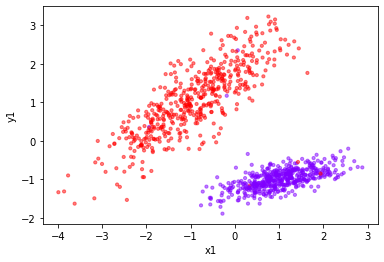

In [48]:
plt.scatter(X[:,0],X[:,1],marker = 'o',alpha = 0.5,c= y,s= 10,cmap='rainbow')
plt.xlabel('x1')
plt.ylabel('y1')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [23]:
X_train.shape

(700, 2)

In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
from sklearn.neighbors import KNeighborsClassifier

In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
from sklearn.tree import DecisionTreeClassifier

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
from sklearn.ensemble import VotingClassifier

In [30]:
lr = LogisticRegression()
knn = KNeighborsClassifier()
nb = GaussianNB()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()


In [45]:
vote = VotingClassifier(estimators = [('lr',lr),('knn',knn),('nb',nb),('dt',dt),('rf',rf)],voting = 'hard',
                       n_jobs=-1)

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

def eval_clf(predictions,actual):
    print(confusion_matrix(predictions,actual))
    print('accuracy',accuracy_score(predictions,actual))
    print("f1",f1_score(predictions,actual,average= 'weighted'))
    print("precision ", precision_score(predictions,actual,average = 'weighted'))
    print("Recall :", recall_score(predictions,actual, average = 'weighted'))

In [47]:
for clf in (lr,knn,nb,dt,rf):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("\n", clf.__class__.__name__)
    eval_clf(y_pred,y_test)

C:\Users\yash\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)



 LogisticRegression
[[132  20]
 [ 24 124]]
accuracy 0.8533333333333334
f1 0.8532811480756687
precision  0.8535327635327636
Recall : 0.8533333333333334

 KNeighborsClassifier
[[146  16]
 [ 10 128]]
accuracy 0.9133333333333333
f1 0.9134377090860432
precision  0.9142735042735043
Recall : 0.9133333333333333

 GaussianNB
[[132  20]
 [ 24 124]]
accuracy 0.8533333333333334
f1 0.8532811480756687
precision  0.8535327635327636
Recall : 0.8533333333333334

 DecisionTreeClassifier
[[139  19]
 [ 17 125]]
accuracy 0.88
f1 0.8800374148144849
precision  0.880153133903134
Recall : 0.88

 RandomForestClassifier
[[146  15]
 [ 10 129]]
accuracy 0.9166666666666666
f1 0.9167456239108545
precision  0.9173344017094018
Recall : 0.9166666666666666
